# INFO 2950 Final Project
Michelle Li (myl39), Larrisa Chen (lc949), Christina Jin (cej65), Jade Eggleston (jce76)

## Research Question
What can we infer about the demographics / lifestyle of Airbnb users in different US regions, based on Airbnb sizes, descriptions, prices, amenities, and host attributes (e.g. superhost)? We’ll define demographics and lifestyle as:
- Demographic: socioeconomic status, household size
- Lifestyle: preferred amenities, value of credibility and hospitality


## Data Origin/Description

**For what purpose was the dataset created?**
Our datasets explore all recorded Airbnb locations within the largest cities of 9 US regions. We compiled Airbnb rental data in Boston, NYC, Chicago, The Twin Cities, DC, Nashville, Dallas, Las Vegas (represented by Clark County), and Los Angeles, measuring across 26 criteria that US consumers consider when choosing the optimal Airbnb. By analyzing the average values within each criteria, we hope to identify the demographics and lifestyles of Airbnb consumers in each US region and determine key differences amongst them. In terms of demographics, we hope to identify the average consumer’s socioeconomic status and household size; regarding lifestyle, we hope to identify the average consumer’s preferred amenities and value of credibility and hospitality. 

**What (other) tasks could the dataset be used for?**
We believe this data could be useful in creating target consumer profiles for Airbnb hosts to account for when providing their services. Our analyses could also have further implications influencing tourism services in each major city, allowing offerings to be well tailored to consumers and ensuring a positive experience where they will likely visit again.  

**Who created the dataset (e.g., which team, research group) and on behalf of which entity (e.g., company, institution, organization)? How was the data associated with each instance acquired?**
The source of our datasets comes from the Inside Airbnb database, which is an independent project run by data activists to provide information about Airbnb’s impact in residential communities. As this information is collected directly from the Airbnb platform, this data is directly observable from the website. 
 
**Is it possible to identify individuals (i.e., one or more natural persons), either directly or indirectly (i.e., in combination with other data) from the dataset? If so, please describe how.**
It holds some identifiable information involving Airbnb hosts, who have consented to publicly displaying their data. However, for our project purposes, we have taken a smaller sample of data from the database and cleaned/merged it according to our needs (explained in the Data Cleaning section).
 
**How many instances are there in total (of each type, if appropriate)?**
We cleaned/merged multiple datasets so that each city would have a single dataset displaying all relevant information in it (creating a total of 9 datasets for our project). All instances within each dataset are either a quantifiable number, price, percentage, date, review score, word description, or boolean. 8 of the criteria’s instances are quantifiable numbers, 1 criteria’s instance is price, 2 criteria’s instances are percentages, 2 criteria’s instances are dates, 1 criteria’s instance is a review score, 7 of the criteria’s instances are a word description, and 4 of the criteria’s instances are a boolean. Further explained in our Data Cleaning section, some instances were missing under certain criteria due to lack of available data. This occurs since every Airbnb listing varies with including or excluding optional information (such as host descriptions or amenities).

**What do the instances that comprise the dataset represent (e.g., documents, photos, people, countries)?** 
Each of our datasets are defined by a city, and include all the available listings within the city and their criteria. Each listing is defined by its unique numeric ID, display name, and informational description showcased on the website’s listing. The first few columns of criteria involve the Airbnb host, including when they became a host (host_since); their personal background (host_about); response rate and response time to customer queries; acceptance rate of new tenants (host_acceptance_rate); whether they are a host with outstanding experience (host_is_superhost); amount of listings they own (host_listings_count); whether they have a public profile picture (host_has_profile_pic); and whether they are verified on Airbnb (host_identity_verified). Additionally, the next criteria involve the logistical aspects of the unit, including the neighborhood it is located in (neighborhood_cleansed); the type of room (room_type); how many people it can house (accommodates); number of bathrooms (bathrooms_text), bedrooms, and beds; amenities available; price per night (price); and the minimum and maximum number of nights it can be booked (minimum_nights and maximum_nights). Furthermore, the next criteria involve customer reviews for the unit, including the number of reviews, most recently posted review (last_review), and review rating out of 5 (review_scores_rating). The final criteria indicates whether the listing can be booked without needing the host’s approval (instant_bookable).

**Is there anything that a dataset consumer might need to know to avoid uses that could result in unfair treatment of individuals or groups (e.g., stereotyping, quality of service issues) or other risks or harms (e.g., legal risks, financial harms)? Are there tasks for which the dataset should not be used?**
Since our datasets could include identifiable information about the Airbnb hosts (within listing description and host description), there could be a risk of using this information to draw unfounding analyses that discriminate against minority identifying Airbnb hosts. Hence, our dataset should not be used to profile Airbnb hosts based upon their demographics.

## Data Limitations 

**Limitation 1:** The cities we selected do not capture the full picture of the U.S. domestic tourism market. At first, we planned to select the city from each U.S. geographic region with the most inbound tourism, using the regions defined by the CDC. These cities would have been:
   - New England: Boston, Massachusetts
   - Middle Atlantic: New York, New York
   - East North Central: Chicago, Illinois
   - West North Central: The Twin Cities (Minneapolis and St. Paul)
   - South Atlantic: Orlando, Florida
   - East South Central: Nashville, Tennessee
   - West South Central: San Antonio, Texas
   - Mountain: Las Vegas, Nevada
   - Pacific: Los Angeles, California

However, after checking the available Airbnb databases, we realized that there was no data for two of these cities: Orlando and San Antonio. As a result, we had to select the next largest cities with available data: Washington DC and Dallas. Additionally, rather than Las Vegas, Airbnb had data for Clark County, Nevada, which contains Vegas. This data may capture some data points outside of the target metropolitan area. Overall, these data limitations made it so that we cannot analyze some target cities for our research question. 

**Limitation 2:** Another limitation is that we had to delete many columns from the datasets, solely because there were inconsistencies between cities. For instance, The dataset for New York City had a column called “neighborhood group (cleansed)”, which showed the borough that Airbnb was located in. This data would have been helpful for our analysis of NYC, but there was no  data in “neighborhood group (cleansed)” for the remaining cities. We had to delete several other columns, like “bathrooms” and “license”, because they were empty for many cities. Had these columns been populated for all of the cities, we could have used them in our analysis. 

**Limitation 3:** A final limitation with our data was that we had to set a definition for what makes a listing “private”. In the raw data, there were two columns that suggested the degree of privacy of the listing: 1) “room type” which indicated whether the listing is a private room, shared room, or entire home/apartment, and 2) “bathroom text”, which included the number of bathrooms, and occasionally, whether the bathrooms were shared or private. Since we were missing a lot of data for whether bathrooms were shared or private, we had to create a single variable “is_private” which aggregates info from both columns to determine whether the overall listing is private or not. This is a limitation, as it would have been helpful to know how the separate factors, bedroom privacy and bathroom privacy, influence users’ decisions.

In [2]:
import numpy as np
import pandas as pd
import regex as re
import json

import ast
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [3]:
%load_ext sql

%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:memory:

## Dataframes

In [4]:
nyc_listings_df = pd.read_csv("./cleaned_data/nyc_listings_clean.csv")
bos_listings_df = pd.read_csv("./cleaned_data/bos_listings_clean.csv")
chi_listings_df = pd.read_csv("./cleaned_data/chi_listings_clean.csv")
dal_listings_df = pd.read_csv("./cleaned_data/dal_listings_clean.csv")
nsh_listings_df = pd.read_csv("./cleaned_data/nsh_listings_clean.csv")
msp_listings_df = pd.read_csv("./cleaned_data/msp_listings_clean.csv")
la_listings_df = pd.read_csv("./cleaned_data/la_listings_clean.csv")
lv_listings_df = pd.read_csv("./cleaned_data/lv_listings_clean.csv")
dc_listings_df = pd.read_csv("./cleaned_data/dc_listings_clean.csv")

nyc_calendar_df = pd.read_csv("./cleaned_data/nyc_calendar_clean.csv")
bos_calendar_df = pd.read_csv("./cleaned_data/bos_calendar_clean.csv")
chi_calendar_df = pd.read_csv("./cleaned_data/chi_calendar_clean.csv")
dal_calendar_df = pd.read_csv("./cleaned_data/dal_calendar_clean.csv")
nsh_calendar_df = pd.read_csv("./cleaned_data/nsh_calendar_clean.csv")
msp_calendar_df = pd.read_csv("./cleaned_data/msp_calendar_clean.csv")
la_calendar_df = pd.read_csv("./cleaned_data/la_calendar_clean.csv")
lv_calendar_df = pd.read_csv("./cleaned_data/lv_calendar_clean.csv")
dc_calendar_df = pd.read_csv("./cleaned_data/dc_calendar_clean.csv")

nyc_combined_df = pd.read_csv("./cleaned_data/nyc_combined_clean.csv")
bos_combined_df = pd.read_csv("./cleaned_data/bos_combined_clean.csv")
chi_combined_df = pd.read_csv("./cleaned_data/chi_combined_clean.csv")
dal_combined_df = pd.read_csv("./cleaned_data/dal_combined_clean.csv")
nsh_combined_df = pd.read_csv("./cleaned_data/nsh_combined_clean.csv")
msp_combined_df = pd.read_csv("./cleaned_data/msp_combined_clean.csv")
la_combined_df = pd.read_csv("./cleaned_data/la_combined_clean.csv")
lv_combined_df = pd.read_csv("./cleaned_data/lv_combined_clean.csv")
dc_combined_df = pd.read_csv("./cleaned_data/dc_combined_clean.csv")

amenities_df = pd.read_csv("./cleaned_data/all_amenities_clean.csv")

## Amenities Analysis

In [5]:
variable_array = amenities_df['variable'].to_numpy()
nyc_count = amenities_df['nyc_count'].to_numpy()
bos_count = amenities_df['bos_count'].to_numpy()
chi_count = amenities_df['chi_count'].to_numpy()
dc_count = amenities_df['dc_count'].to_numpy()
dal_count = amenities_df['dal_count'].to_numpy()
lv_count = amenities_df['lv_count'].to_numpy()
la_count = amenities_df['la_count'].to_numpy()
nsh_count = amenities_df['nsh_count'].to_numpy()
msp_count = amenities_df['msp_count'].to_numpy()

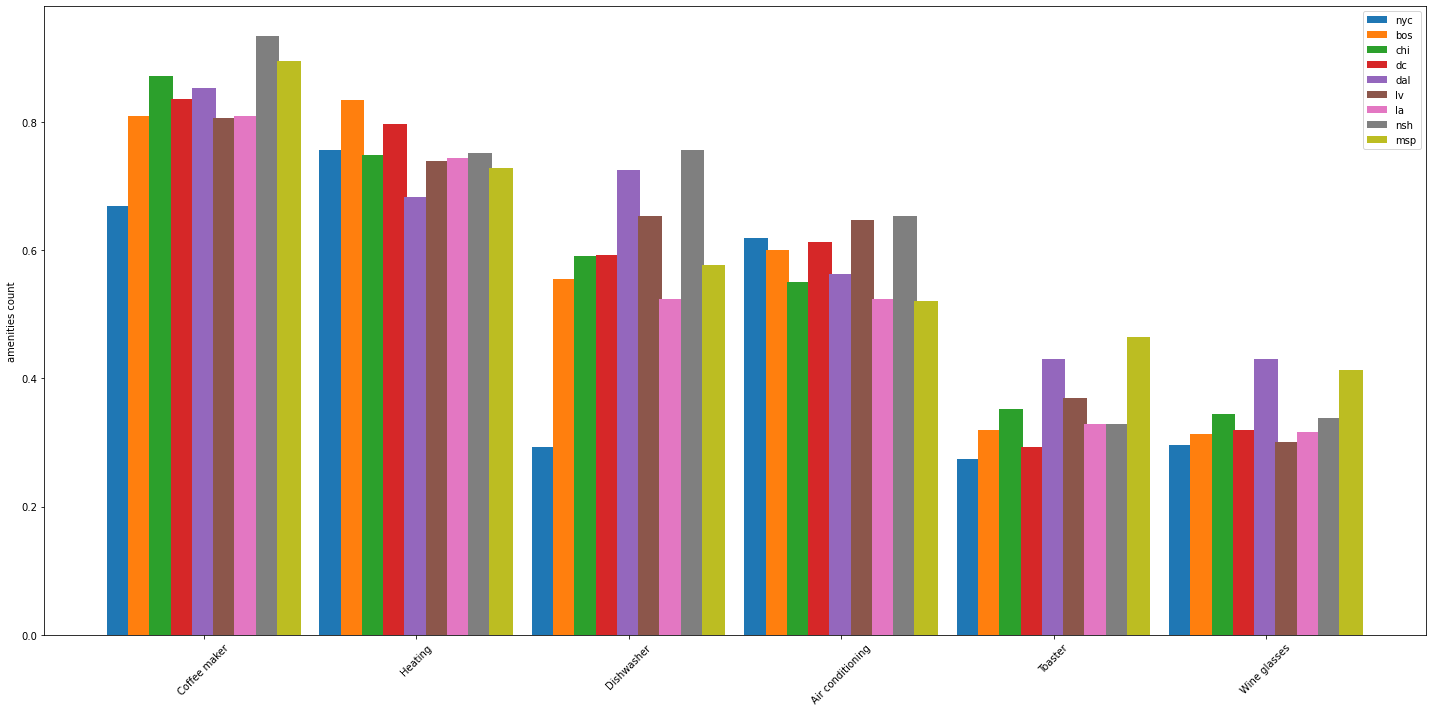

In [6]:
x = np.arange(len(variable_array))
width = 1
fig, ax = plt.subplots(figsize=(20, 10))
nyc_rect = ax.bar(x - 4*(width/10), nyc_count/11094, width/9, label='nyc')
bos_rect = ax.bar(x - 3*(width/10), bos_count/1982, width/9, label='bos')
chi_rect = ax.bar(x - 2*(width/10), chi_count/3384, width/9, label='chi')
dc_rect = ax.bar(x - width/10, dc_count/2493, width/9, label='dc')
dal_rect = ax.bar(x, dal_count/2795, width/9, label='dal')
lv_rect = ax.bar(x + (width/10), lv_count/4927, width/9, label='lv')
la_rect = ax.bar(x + 2*(width/10), la_count/15753, width/9, label='la')
nsh_rect = ax.bar(x + 3*(width/10), nsh_count/4260, width/9, label='nsh')
msp_rect = ax.bar(x + 4*(width/10), msp_count/1771, width/9, label='msp')

ax.set_ylabel('amenities count')
ax.set_xticks(x, variable_array)
ax.legend()

plt.xticks(rotation = 45)

fig.tight_layout()

plt.show()

#remove smoke alarm, essentials, kitchen, hangers, long term stays allowed, wifi

In [7]:
# Frequency table for kitchen amenities based on southern or northern city
kitchen_data = {"kitchen amenity": ["coffee_maker", "dish_washer", "toaster", "wine_glasses"],
        "southern": [6352, 5244, 2596, 2633],
        "northern": [32126, 20177, 13333, 13049]
        }

kitchen_df = pd.DataFrame(kitchen_data)
kitchen_df = kitchen_df.set_index("kitchen amenity")

In [8]:
# Frequency table for temperature control amenities based on hotter or colder city
temp_data = {"climate control": ["heating", "ac"],
        "hotter": [8726, 7516],
        "colder": [27248, 2312]
        }

temp_df = pd.DataFrame(temp_data)
temp_df = temp_df.set_index("climate control")
#where hotter - nsh, dal, lv

In [9]:
stats.chi2_contingency(kitchen_df)
# alpha = 0.05

(217.97651655850586,
 5.496985749544798e-47,
 3,
 array([[ 6778.26772066, 31699.73227934],
        [ 4478.15228772, 20942.84771228],
        [ 2806.04570202, 13122.95429798],
        [ 2762.5342896 , 12919.4657104 ]]))

x^2(3) = 217.97651655850586, p< 0.05.

chi square critical value = 11.07050

because 217.97651655850586 is greater than the critical value, this means we can reject the null hypothesis

In [10]:
stats.chi2_contingency(temp_df)
# alpha = 0.05

(9194.819806731899,
 0.0,
 1,
 array([[12756.86013711, 23217.13986289],
        [ 3485.13986289,  6342.86013711]]))

x^2(1) = 9194.819806731899, p< 0.05.

chi square critical value = 3.84146

because 9194.819806731899 is greater than the critical value, this means we can reject the null hypothesis

For this analysis, we wanted to look at how demographics and lifestyle differ in each city based on the most frequent amenities. We scraped the words from each listing ammenties description and counted the frequencies of each word in different cities. 

We expect the popular amenities to differ slightly between cities based on factors like climate, culture, and the typical family unit in that city. We analyzed two hypotheses within this idea:

**Hypothesis 1:** Travelers to southern cities value more cooking-related amenities compared to northern cities (e.g. kitchen, coffee-makers, dishes, silverware). Southern cities include Dallas and Nashville; the remaining are Northern

Null Hypothesis: there is no relationship
- p(kitchen amenities | southern city) = p(kitchen amenities)
- p(kitchen amenities | northern city) = p(kitchen amenities)

Alternative Hypothesis: Travelers to southern cities (dal, nsh) value more cooking-related amenities compared to northern cities (e.g. kitchen, coffee-makers, dishes, silverware)
- p(kitchen amenities | southern city ) > p(kitchen amenities | northern city)

**Hypothesis 2:** Climate-control amenities (e.g. heat, AC) are more popular in cities with extreme weather. Cities with hot weather are Las Vegas, Dallas, and Nashville, while the remaining cities experience cold weather.

Null Hypothesis: there is no relationship
- p(heating | warmer city) = p(heating | colder city) = p(heating)
- p(ac | warmer city) = p(ac | colder city) = p(ac)

Alternative Hypothesis: Climate-control amenities (e.g. heat, AC) are more popular in cities with extreme weather. AC is more popular in warmer climates (Las Vegas, Dallas, and Nashville) and heating is more popular in colder climates (remaining). 
- p(heating | warmer city) < p(heating | colder city)
- p(ac | warmer city) > p(ac | colder city)


**Results and Analysis**

Hypothesis 1: In order to test this hypothesis, we created a contingency table with the frequencies of kitchen ammenities in northern and southern states. We then ran a chi square hypothesis test, which produced a chi squared value for dof of 3 of 217.97651655850586. This supports rejecting the null hypothesis as the critical value is 11.07050 which is less than the resulting statistical value. Thus, we can conclude that southern cities are more likely to have kitchen related amenities than northern states. This is likely due to a stronger cluter around home-cooked meals in the south. We also created a multibar plot with the kitchen amenities (coffee maker, dishwasher, toaster, and wine glasses). We can see in the plot that the frequencies for these amentiies are much higher for Dallas (purple) and Nashville (grey), further supporting our hypothesis. 

Hypothesis 2: Similar to our first hypothesis, we created a contingency table with the frequencies of climate control amenities in hot weather states and cold weather states.We ran the chi square hypothesis test, which also produced a statistically significant chi squared value for a dof of 9194.819806731899. This is also greater than the critical value of 3.84146. So, we can conclude that cities that experience extreme weather are more likely to have climate-control amentities. Again, we also plotted the climate-control amentities (air conditioning and heating) in the multi-bar plot. In the plot, we can see that heating was most frequently recorded in New York City, Boston, Chicago, and DC, which all experience more extreme winters than the other cities. Similarly, air conditioning was most frequently recorded in Las Vegas and Nashville, which have the most hot, arid climates. Out multibr plot further supports the hypothesis that city amenties vary based on the region. 

Overall, our analyses provide sufficient evidence to support our hypothesis that popular amenities differ between cities based on factors like climate and culture.

## Price Analysis

In [11]:
# DATAFRAME WITH ALL CITIES

# nyc mini df
nyc_mini_df = pd.DataFrame(nyc_combined_df[["price", "review_scores_rating", "host_is_superhost", "days_booked"]])
nyc_list = ['New York'] * len(nyc_combined_df)
nyc_mini_df['city'] = nyc_list

# bos mini df
bos_mini_df = pd.DataFrame(bos_combined_df[["price", "review_scores_rating", "host_is_superhost", "days_booked"]])
bos_list = ['Boston'] * len(bos_combined_df)
bos_mini_df['city'] = bos_list

# chi mini df
chi_mini_df = pd.DataFrame(chi_combined_df[["price", "review_scores_rating", "host_is_superhost", "days_booked"]])
chi_list = ['Chicago'] * len(chi_combined_df)
chi_mini_df['city'] = chi_list

# dc mini df
dc_mini_df = pd.DataFrame(dc_combined_df[["price", "review_scores_rating", "host_is_superhost", "days_booked"]])
dc_list = ['DC'] * len(dc_combined_df)
dc_mini_df['city'] = dc_list

# dal mini df
dal_mini_df = pd.DataFrame(dal_combined_df[["price", "review_scores_rating", "host_is_superhost", "days_booked"]])
dal_list = ['Dallas'] * len(dal_combined_df)
dal_mini_df['city'] = dal_list

# lv mini df
lv_mini_df = pd.DataFrame(lv_combined_df[["price", "review_scores_rating", "host_is_superhost", "days_booked"]])
lv_list = ['Las Vegas'] * len(lv_combined_df)
lv_mini_df['city'] = lv_list

# la mini df
la_mini_df = pd.DataFrame(la_combined_df[["price", "review_scores_rating", "host_is_superhost", "days_booked"]])
la_list = ['Los Angeles'] * len(la_combined_df)
la_mini_df['city'] = la_list

# nsh mini df
nsh_mini_df = pd.DataFrame(nsh_combined_df[["price", "review_scores_rating", "host_is_superhost", "days_booked"]])
nsh_list = ['Nashville'] * len(nsh_combined_df)
nsh_mini_df['city'] = nsh_list

# msp mini df
msp_mini_df = pd.DataFrame(msp_combined_df[["price", "review_scores_rating", "host_is_superhost", "days_booked"]])
msp_list = ['Twin Cities'] * len(msp_combined_df)
msp_mini_df['city'] = msp_list

# data frame with all cities
minis = [nyc_mini_df, bos_mini_df, chi_mini_df, dc_mini_df, dal_mini_df, 
        lv_mini_df, la_mini_df, nsh_mini_df, msp_mini_df]
all_df = pd.concat(minis, ignore_index=True)
all_df = all_df.dropna(axis=0)

In [12]:
# Prices T-test Analysis

# more expensive states
nyc_sample = nyc_mini_df["price"].sample(n=100)
la_sample = la_mini_df["price"].sample(n=100)
bos_sample = bos_mini_df["price"].sample(n=100)
dc_sample = dc_mini_df["price"].sample(n=100)
lv_sample = lv_mini_df["price"].sample(n=100)
expensive_states = np.concatenate((nyc_sample, la_sample, bos_sample, dc_sample, lv_sample), axis=0)

# less expensive states
nsh_sample = nsh_mini_df["price"].sample(n=100)
msp_sample = msp_mini_df["price"].sample(n=100)
chi_sample = chi_mini_df["price"].sample(n=100)
dal_sample = dal_mini_df["price"].sample(n=100)
inexpensive_states = np.concatenate((nsh_sample, msp_sample, chi_sample, dal_sample), axis=0)

stats.ttest_ind(a=expensive_states, b=inexpensive_states, equal_var=True)

Ttest_indResult(statistic=0.8264669506519657, pvalue=0.40875879099502055)

<AxesSubplot:xlabel='price', ylabel='city'>

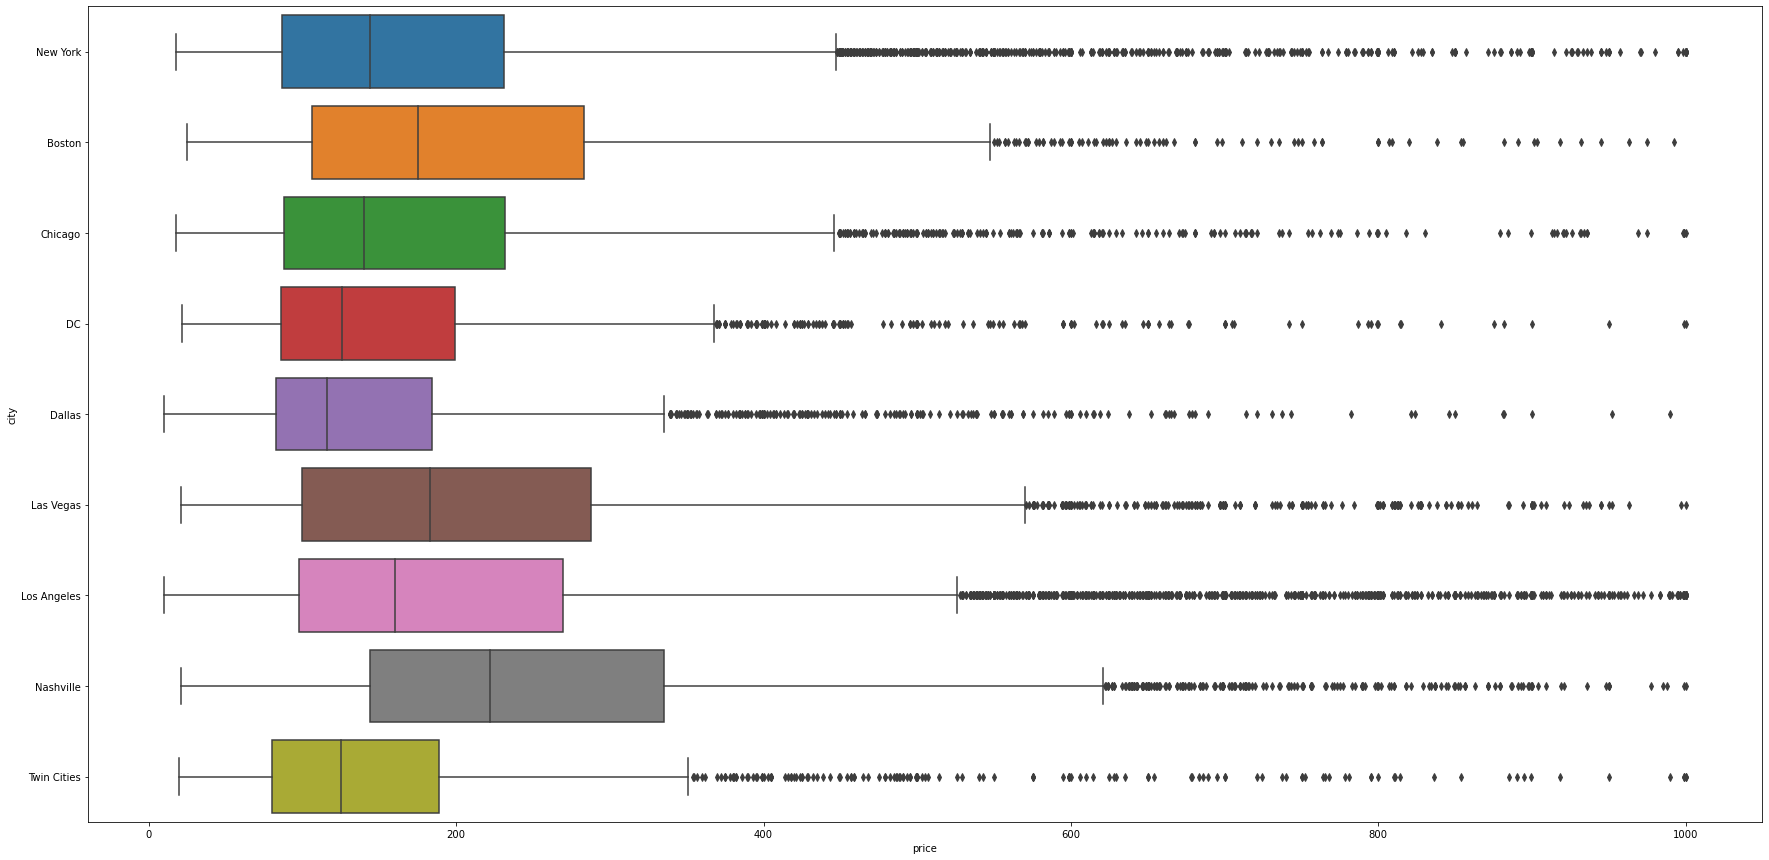

In [13]:
# PRICE BOXPLOT

all_df_price_trim = all_df[all_df['price'] <= 1000]
fig, ax = plt.subplots(figsize=(30, 15))
sns.boxplot(data=all_df_price_trim, x="price", y="city")

We wanted to see if we can infer information about the socioeconomic status and willingness to pay of Airbnb users in different cities, based on the prices of listings.

**Hypothesis:** 
Cities in states that are expensive to live in will attract more affluent users, leading to higher priced listings. On the other hand, cities in less expensive states will attract less affluent users (have lower listing prices).

We split the cities into two groups, referencing this state cost of living index    
(https://worldpopulationreview.com/state-rankings/most-expensive-states-to-live-in)
- In more expensive states: NYC, LA, Boston, DC, Las Vegas
- In less expensive states: Nashville, Twin Cities, Chicago, Dallas
    
Null Hypothesis (µ1 = µ2): the population mean for the more expensive states is equal to the less expensive states
Alternative Hypothesis (µ1 ≠ µ2): the population mean for the more expensive states is significantly different than the less expensive states (we are predicting this will be true). 

**Results and Analysis**

When we conducted a two-sample t-test on the expensive states group and inexpensive states groups, we got a p-value of 0.3326. This is not significant at a 0.05 level. So, our results are insufficient to reject the null hypothesis. There does not seem to be a relationship between the cost of living in a state, and prices of Airbnbs in those states. Thus, we could not make a conclution about the socioeconomic status of users in difference cities based on this initial analysis. 

We decided to create a boxplot of the listing prices in each city to further analyze potential relationships. The boxplot shows that there are large differences in the median Airbnb listing price in different cities. The median price is highest in Nashville, Las Vegas, and Boston at around $200. While Las Vegas and Boston are consistent with our hypothesis, Nashville contradicts it, becuase because Tennessee is a state with a lower cost of living. The lowest median prices were in Dallas and the Twin Cities, which is consistent with what we expected. The Nashville lising prices may be high because they are for larger parties (e.g. 5-6 people instead of 1-2), which we can explore further later on. 

The boxplot also shows that the variance of Airbnb listing prices differs between cities. The IQR is very large for cities like Boston, Las Vegas, and Nashville. For DC and Dallas, the range is much smaller. The larger IQR could indicate that a more diverse range of income demographics travel that city; travelers could include upper income vacationers, willing to spend more on a listing, in addition to middle income business people, traveling on a budget. Smaller IQRs indicate a more consistent traveler income demographic.

## Host Credibility Analysis

(0.0, 0.8)

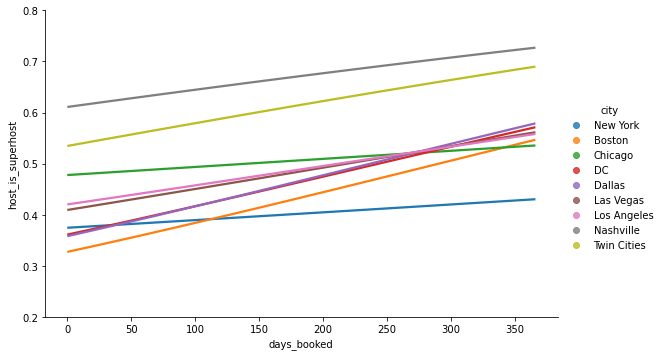

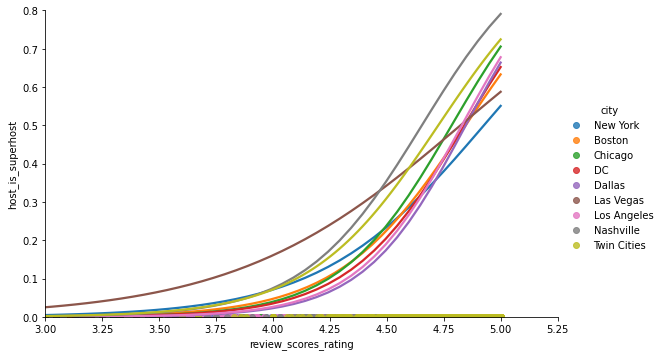

In [14]:
# CREDIBILIY GRAPHS

sns.lmplot(data= all_df, x= "days_booked", y= "host_is_superhost", hue="city", logistic=True, ci=None, \
           height=5, aspect= 8/5)
plt.ylim(0.2, 0.8)

sns.lmplot(data= all_df, x= "review_scores_rating", y= "host_is_superhost", hue="city", logistic=True, ci=None, \
           height=5, aspect= 8/5)
plt.xlim(3,)
plt.ylim(0, 0.8)

In [15]:
# Logistic Regression Analysis

# NYC
nyc_superhost = nyc_mini_df["host_is_superhost"].to_numpy().reshape(-1, 1)
nyc_ratings = nyc_mini_df["review_scores_rating"].to_numpy().reshape(-1, 1)
nyc_log_reg = LogisticRegression().fit(nyc_ratings, nyc_superhost.ravel())

# Boston
bos_superhost = bos_mini_df["host_is_superhost"].to_numpy().reshape(-1, 1)
bos_ratings = bos_mini_df["review_scores_rating"].to_numpy().reshape(-1, 1)
bos_log_reg = LogisticRegression().fit(bos_ratings, bos_superhost.ravel())

# Chicago
chi_superhost = chi_mini_df["host_is_superhost"].to_numpy().reshape(-1, 1)
chi_ratings = chi_mini_df["review_scores_rating"].to_numpy().reshape(-1, 1)
chi_log_reg = LogisticRegression().fit(chi_ratings, chi_superhost.ravel())

# DC
dc_superhost = dc_mini_df["host_is_superhost"].to_numpy().reshape(-1, 1)
dc_ratings = dc_mini_df["review_scores_rating"].to_numpy().reshape(-1, 1)
dc_log_reg = LogisticRegression().fit(dc_ratings, dc_superhost.ravel())

# Dallas
dal_superhost = dal_mini_df["host_is_superhost"].to_numpy().reshape(-1, 1)
dal_ratings = dal_mini_df["review_scores_rating"].to_numpy().reshape(-1, 1)
dal_log_reg = LogisticRegression().fit(dal_ratings, dal_superhost.ravel())

# Las Vegas
lv_superhost = lv_mini_df["host_is_superhost"].to_numpy().reshape(-1, 1)
lv_ratings = lv_mini_df["review_scores_rating"].to_numpy().reshape(-1, 1)
lv_log_reg = LogisticRegression().fit(lv_ratings, lv_superhost.ravel())

# Los Angeles
la_superhost = la_mini_df["host_is_superhost"].to_numpy().reshape(-1, 1)
la_ratings = la_mini_df["review_scores_rating"].to_numpy().reshape(-1, 1)
la_log_reg = LogisticRegression().fit(la_ratings, la_superhost.ravel())

# Nashville
nsh_superhost = nsh_mini_df["host_is_superhost"].to_numpy().reshape(-1, 1)
nsh_ratings = nsh_mini_df["review_scores_rating"].to_numpy().reshape(-1, 1)
nsh_log_reg = LogisticRegression().fit(nsh_ratings, nsh_superhost.ravel())

# Twin Cities
msp_superhost = msp_mini_df["host_is_superhost"].to_numpy().reshape(-1, 1)
msp_ratings = msp_mini_df["review_scores_rating"].to_numpy().reshape(-1, 1)
msp_log_reg = LogisticRegression().fit(msp_ratings, msp_superhost.ravel())

# Table with slopes and coefficients
slope = [nyc_log_reg.coef_[0][0], bos_log_reg.coef_[0][0], chi_log_reg.coef_[0][0],
         dc_log_reg.coef_[0][0], dal_log_reg.coef_[0][0], lv_log_reg.coef_[0][0],
         la_log_reg.coef_[0][0], nsh_log_reg.coef_[0][0], msp_log_reg.coef_[0][0]]

intercept = [nyc_log_reg.intercept_[0], bos_log_reg.intercept_[0], chi_log_reg.intercept_[0], 
              dc_log_reg.intercept_[0], dal_log_reg.intercept_[0], lv_log_reg.intercept_[0], 
              la_log_reg.intercept_[0], nsh_log_reg.intercept_[0], msp_log_reg.intercept_[0]]

city = ["New York City", "Boston", "Chicago", "DC", "Dallas", "Las Vegas",
        "Los Angeles", "Nashville", "Twin Cities"]

host_rating_data = {'city': city, 'slope': slope, 'intercept': intercept}
host_rating_df = pd.DataFrame(data=host_rating_data)
print(host_rating_df.head(9))

            city     slope  intercept
0  New York City  2.649226 -13.105760
1         Boston  3.213985 -15.627033
2        Chicago  3.668515 -17.576910
3             DC  3.517900 -17.072883
4         Dallas  3.844939 -18.685905
5      Las Vegas  1.854783  -8.967946
6    Los Angeles  3.279846 -15.974560
7      Nashville  3.689621 -17.150050
8    Twin Cities  2.987213 -14.089026


We wanted to see if we can infer information about the lifestyle of Airbnb users in different cities; more specifically, we wanted to identify how much they value credibility of bookings based upon the probability that an Airbnb host is labeled a "superhost". The "superhost" badge indicates that the host meets the criteria of maintaining high high number of stays, low cancellation rates, and quick response rates.

**Hypothesis:** 

The number of bookings a listing has is dependent on host credibility (i.e if the host is a superhost). Additionally, we expect different cities have different values on host credibility. 

**Graphs and Analysis**

The first graph above plots the probability that the host is a superhost vs the number of days booked in the Airbnbs of each city. There is a general positive trend that a higher probability of being a superhost is associated with a higher number of bookings, but the slope is extremely minimal. There is also little-to-no differentiation among the cities. The increase in number of bookings is associated with a mere 0.1 increase in the probability that the host is a superhost, indicating that there is no significant relationship between the two variables. So, this graph was insufficent to support our hypothesis.

Since we were unable to find a significant relationship between the probability of being a superhost and number of bookings in each city, we decided to also explore the probability of being a superhost vs the review scores rating of the Airbnbs in each city. Here, we can clearly see that listings with higher reviews have much higher odds of being a superhost. We also created logistic regressions to analyze the slope coefficients in these graphs (shown in the last dataframe). 7 out of the 9 cities (excluding Las Vegas and New York City) have a slope above 3. Within these cities, an increase in reveiw score from 3.00 to 4.75 leads to a 50% increase in the probability of the host being a superhost. Hence, we can see that the quality of review score is likely dependent on superhost status (i.e credibility). 

Additionally, the graph shows that Las Vegas and New York City have a smaller slope and coefficient compared to the other cities. This could indicate that users in these cities value marginally less about credibility of the host. This decrease in value could be attributed to the nature of Airbnb usage in these cities, where users are likely to book just for a place to sleep while the focus of their traveling experience is exploring the cities (as opposed to making the most out of the Airbnb experience in other cities). Moreover, Nashville possesses the highest slope compared to the other cities, indicating that these Airbnb users likely value the credibility of the host more. This could be attributed to the avergage higher price of the Airbnbs in this city (found in our third analysis), which increases the expectation that users would have on their Airbnb experience. Overall, these findings support our hypothesis that different cities have different values on host credibility.

### Two Tailed Hypothesis Test

In [16]:
nyc_total_bookings = nyc_combined_df["days_booked"].sum()
nyc_superhost = nyc_combined_df[nyc_combined_df["host_is_superhost"]]["days_booked"] / nyc_total_bookings
nyc_superhost = nyc_superhost[nyc_superhost.notna()].tolist()

la_total_bookings = la_combined_df["days_booked"].sum()
la_superhost = la_combined_df[la_combined_df["host_is_superhost"]]["days_booked"] / la_total_bookings
la_superhost = la_superhost[la_superhost.notna()].tolist()

higher_listings_group = nyc_superhost + la_superhost

msp_total_bookings = msp_combined_df["days_booked"].sum()
msp_superhost = msp_combined_df[msp_combined_df["host_is_superhost"]]["days_booked"] / msp_total_bookings
msp_superhost = msp_superhost[msp_superhost.notna()].tolist()

nsh_total_bookings = nsh_combined_df["days_booked"].sum()
nsh_superhost = nsh_combined_df[nsh_combined_df["host_is_superhost"]]["days_booked"] / nsh_total_bookings
nsh_superhost = nsh_superhost[nsh_superhost.notna()].tolist()

chi_total_bookings = chi_combined_df["days_booked"].sum()
chi_superhost = chi_combined_df[chi_combined_df["host_is_superhost"]]["days_booked"] / chi_total_bookings
chi_superhost = chi_superhost[chi_superhost.notna()].tolist()

bos_total_bookings = bos_combined_df["days_booked"].sum()
bos_superhost = bos_combined_df[bos_combined_df["host_is_superhost"]]["days_booked"] / bos_total_bookings
bos_superhost = bos_superhost[bos_superhost.notna()].tolist()

lv_total_bookings = lv_combined_df["days_booked"].sum()
lv_superhost = lv_combined_df[lv_combined_df["host_is_superhost"]]["days_booked"] / lv_total_bookings
lv_superhost = lv_superhost[lv_superhost.notna()].tolist()

dc_total_bookings = dc_combined_df["days_booked"].sum()
dc_superhost = dc_combined_df[dc_combined_df["host_is_superhost"]]["days_booked"] / dc_total_bookings
dc_superhost = dc_superhost[dc_superhost.notna()].tolist()

dal_total_bookings = dal_combined_df["days_booked"].sum()
dal_superhost = dal_combined_df[dal_combined_df["host_is_superhost"]]["days_booked"] / dal_total_bookings
dal_superhost = dal_superhost[dal_superhost.notna()].tolist()

lower_listings_group = msp_superhost + nsh_superhost + chi_superhost + bos_superhost + lv_superhost + dc_superhost + dal_superhost

df = len(nyc_superhost) + len(la_superhost) + len(msp_superhost) + len(nsh_superhost) + len(bos_superhost) + len(chi_superhost) + len(lv_superhost) + len(dc_superhost) + len(dal_superhost) - 2
critical_value = stats.t.ppf(q=0.05,df=df)
print("critical value: " + str(critical_value))

stats.ttest_ind(a=higher_listings_group, b=lower_listings_group, equal_var=True)

critical value: -1.644926583199111


Ttest_indResult(statistic=-90.74067844269545, pvalue=0.0)

#### Analysis

**Hypothesis**: 

   * Null: The host credibility (superhost) in a listing does not affect it’s booking levels.
   * Alternative: The number of bookings a listing has is dependent on host credibility (i.e if the host is a superhost) in cities which have higher levels of listings as a way for users to narrow down which AirBnb to book.

Our initial hypothesis was that in a city with a large number of listings such as New York City or Los Angeles, which have significantly more listings than the other 7 cities, the listings from superhosts are more likely to be booked since when given such a large number of possibilities, users will turn to more credible sources such as superhosts to book their Airbnbs. On the other hand, in cities with less listings and therefore less options, users are less likely to rely on superhosts to make their decisions as host credibility is as much a determining factor. We are operating under the assumption that a host being a superhost is a sign of credibility as they are in a sense, endorsed or promoted by Airbnb, attributing to their credibility and causing them to stand out from the rest of the listings. We performed Two-Tailed t test to test our hypothesis, which was ultimately statistically significant. To perform this t-test we took all the number of bookings for every listing from a superhost in each city and found the ratio of the number bookings from superhosts over the total number of bookings from the city. By using ratios, we can standardize the values we are comparing from each city in our test. Then, we divided the cities into two groups with one group being NYC and LA while the other group being the other cities. NYC and LA have significantly more listings than the rest of the cities hence why we divided the groups that way. The critical value is -1.6449. We see that the test statistic has a value of -90.7407, which is outside of the range of the critical value to positive critical value therefore the null hypothesis is rejected and we can conclude that travelers to cities with higher number of listings value credibility of host more often than travels to cities with lower number of listings. Therefore, we can conclude that there is a relationship between cities with higher listings and more dependency on super host status. We predict that this is due to users having more choices for listings and using super host status as a criteria for a booking.

## Description Analysis

In [17]:
nyc_listings_df["city"] = "nyc"
bos_listings_df["city"] = "bos"
chi_listings_df["city"] = "chi"
la_listings_df["city"] = "la"
lv_listings_df["city"] = "lv"
dc_listings_df["city"] = "dc"
msp_listings_df["city"] = "msp"
nsh_listings_df["city"] = "nsh"
dal_listings_df["city"] = "dal"

# because of the large disparity between each city for the number of listings, we sampled
nyc_sample = nyc_listings_df.sample(n=1500)
la_sample = la_listings_df.sample(n=1500)
bos_sample = bos_listings_df.sample(n=1500)
dc_sample = dc_listings_df.sample(n=1500)
lv_sample = lv_listings_df.sample(n=1500)
chi_sample = chi_listings_df.sample(n=1500)
dal_sample = dal_listings_df.sample(n=1500)
nsh_sample = nsh_listings_df.sample(n=1500)
msp_sample = msp_listings_df.sample(n=1500)


all_cities = pd.concat([nyc_sample, bos_sample, chi_sample, la_sample, lv_sample, dc_sample, msp_sample, nsh_sample, dal_sample], ignore_index=True)
all_descriptions_df = all_cities[["city", "description"]]

tfidf_vectorizer = TfidfVectorizer(min_df=25)
description_tfidf = tfidf_vectorizer.fit_transform(all_descriptions_df["description"])

In [18]:
# train/test split
descriptions_train, descriptions_test, city_train, city_test = train_test_split(description_tfidf, all_descriptions_df["city"], test_size = .25, random_state=0)
nb_classifier = MultinomialNB()

nb_classifier.fit(descriptions_train, city_train)
print(nb_classifier.score(descriptions_test, city_test))

0.8832592592592593


In [20]:
# see if model can predict city from description

nyc_description = "Relax in this calm and stylish one room apartment for solo pleasure or business travel. Work outdoors or just enjoy a tranquil backyard with an umbrella, bench and table. There is one twin bed and private bath for use. Fast Wifi available and the apartment is in an energetic residential neighborhood. It is a 5 minute walk to the closest subway station. There are many restaurants/cafes/supermarkets  and tourist attractions only a couple of subway stops away. There is street parking only."
dal_description = "This spacious 6 bedroom guesthouse is a convenient and affordable option for large families to explore the beauty of our town! Our guesthouse has stellar amenities right at your fingertips, including 3 queen sized beds, 3 twin-sized beds, stainless steel cookware, wifi, and a pool! It’s the best spot for you to have fun/take care of your kids for any long-term stay, especially with the designated play room and large dishwasher to wash dishes. "
bos_description = "This studio apartment with a washer dryer in the building is located in the heart of this city, a 3 min walk to Public Transportation to get around town. It is designed with simple modern style and has everything you need for a short stay with the comforts of home. Fully stocked kitchen has everything you'd need to cook a basic meal. The unit is accessible by self-check-in via our smart lock. The unit has heating available for colder months."
nsh_description = "Luxurious rooftop apartment with a panoramic view of downtown, located right in the heart of the city! Stocked with many high quality kitchen and living essentials, plan the perfect extravagant getaway with your family. The modern design of the apartment emulates the perfect night in while also having a comforting, homey vibe best for family  fun and entertainment. Past guests LOVE the complimentary assortments of coffee provided by the apartment’s Nespresso coffeemaker, so be sure to try that during your stay. "
chi_description = "Our apartment has one full bathroom with a shower, a sink, and a toilet. In addition to hand soap and bath towels, we provide shampoo, conditioner, and body wash. There is a private workspace available for remote work and there are security cameras on the property for everyone’s safety. A food adventure combined with leisurely strolls and relaxing picnics in a lively neighborhood. These are only a few of the things you might enjoy and take pleasure in while residing in this simple yet peaceful home.  This apartment is at the heart  where music lovers may also have fun, while foodies are free to indulge at the city's top restaurants."
dc_description = "This homey condo is only a 10 minute walk away from the most famous museums in the city. Designed for the work/play balance, our featured amenities include a standing desk for remote working, irons/hangers to take care of your professional attire, and a large, flat screen TV and mini pool table for you to relax after a long day of work. Don’t forget to take the time to explore all the historic monuments as well. Of course, our number one priority is your safety– the condo is fully stocked with smoke alarms and a fire extinguisher for your convenience. "
msp_description = "This amazing, low cost, two-room suite is located on the basement level of a beautiful Queen Ann victorian home.  There are  carbon monoxide alarms and smoke alarms installed throughout the home.  This suite has a private bedroom, office, and a private bathroom. There is a fenced backyard with charcoal grill under a gazebo so you can grill all year round."
la_description = "Gorgeous scenic condo 5 min away from large shopping centers and food stops. Enjoy a relaxing day under the sun on the outdoor patio, furnished with classy chairs and a large hot tub. It has a chic open living room and 1 spacious bedroom. There is also free street parking a 1 minute walk away from the condo at your convenience. "
lv_description = "Bright 2 bedroom apartment, featuring 2 full baths, one large kitchen, balcony, fireplace, and air conditioning. It is a quiet, comfortable atmosphere where you can wind down after a fun night out. Great space for your family to enjoy a wild vacation while also taking the time to relax!"

my_reviews = [lv_description, la_description, msp_description, dc_description, nsh_description, chi_description, nyc_description, dal_description, bos_description]
nb_classifier.predict(tfidf_vectorizer.transform(my_reviews))

array(['la', 'lv', 'msp', 'dc', 'nsh', 'chi', 'nyc', 'dal', 'chi'],
      dtype='<U3')

#### Analysis